In [58]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor as RFR
%matplotlib inline
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import h2o
from h2o.automl import H2OAutoML
scaler=StandardScaler()

from sklearn.metrics import mean_squared_error as mse

In [2]:
data2015=pd.read_csv('data/coches-de-segunda-mano-sample.csv')

In [132]:
data2015.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambiente 200 L1,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfortlin Edition BMT,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion Trasera,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [137]:
data2015[data2015.make=='RENAULT'].head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
33,96f6942670d545a38572afacb3e5f5a6,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Captur,RENAULT Captur Zen TCe 66kW 90CV 5p.,14650,14650.0,Gasolina,2019.0,14000,...,5,Manual,Blanco,10,True,Ald Automotive,Madrid,Spain,2020-12-16 15:45:07,2021-01-15 00:00:00
42,7953b1ccdeeed4cd4ddf310671fa2a27,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Clio,RENAULT Clio Limited 1.2 16v 55kW 75CV 18 5p.,9500,8500.0,Gasolina,2018.0,43543,...,5,Manual,Gris / Plata,22,True,"SEAT Barbera, Ripollet, Manresa, Rubi, Sant Cugat",Barcelona,Spain,2021-01-07 11:38:42,2021-01-15 00:00:00
56,5c626cc6170c9b37907455254279caba,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Mégane,RENAULT Megane Business Energy dCi 66kW 90CV 5p.,10499,9699.0,Diésel,2017.0,47396,...,5,Manual,369 Blanco Glaciar (opaco),10,True,DriveOn,Sevilla,Spain,2021-01-14 14:59:43,2021-01-15 00:00:00
60,1dbd0fdd9cf3d804c55c34c498a24866,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Clio,RENAULT Clio Renault Sport 2.0 16v 200CV 3p.,10000,NaN,Gasolina,2008.0,180000,...,3,Manual,Azul,12,False,2e48952f21eceeba209a4f959b44cf39,Burgos,Spain,2020-11-06 07:27:10,2021-01-15 00:00:00
66,44237706555ac9c8f18fff6f3ad5cc0a,9881bcdd5a0ad4733037b3fb25e69c3a,RENAULT,Clio,RENAULT Clio Zen TCe 74 kW 100CV 5p.,16190,14690.0,Gasolina,2020.0,3239,...,5,Manual,Marrón (MARRON VISON),17,True,Talleres Clemente,Madrid,Spain,2021-01-11 10:04:56,2021-01-15 00:00:00


In [142]:
BI=(18800*.56/(1+0.21+0.0975))
BI

8052.007648183559

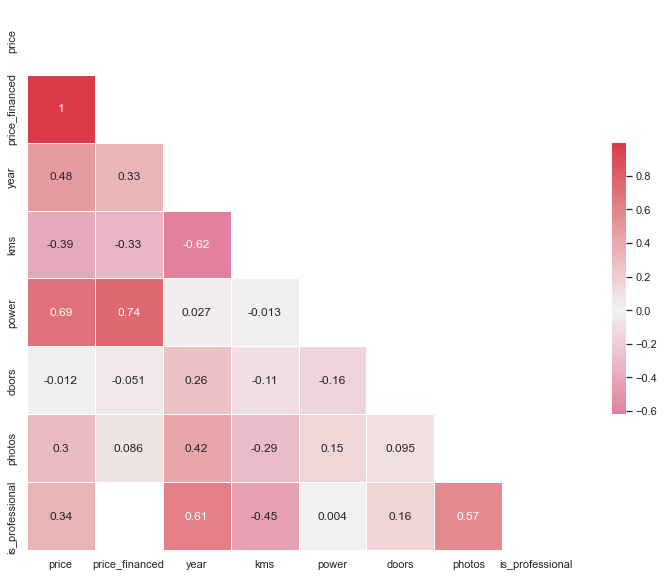

In [4]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data2015.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)



sns.heatmap(data2015.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5},
           annot=True);


In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 18.0.1.1+2-6, mixed mode, sharing)
  Starting server from C:\Users\alima\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\alima\AppData\Local\Temp\tmphsa0l7g_
  JVM stdout: C:\Users\alima\AppData\Local\Temp\tmphsa0l7g_\h2o_alima_started_from_python.out
  JVM stderr: C:\Users\alima\AppData\Local\Temp\tmphsa0l7g_\h2o_alima_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_alima_2gxycu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [6]:
automl=H2OAutoML(max_models=50,
                 seed=42,   # random_state
                 max_runtime_secs=300,
                 sort_metric='RMSE')

In [7]:
entreno=data2015.copy()

In [8]:
entreno.make.unique(), entreno.model.unique()

(array(['SEAT', 'CITROEN', 'FORD', 'VOLKSWAGEN', 'PEUGEOT', 'LAND-ROVER',
        'HONDA', 'NISSAN', 'MERCEDES-BENZ', 'FIAT', 'SKODA', 'BMW',
        'MAZDA', 'OPEL', 'AUDI', 'VOLVO', 'MITSUBISHI', 'RENAULT', 'KIA',
        'DACIA', 'HYUNDAI', 'JEEP', 'SUZUKI', 'CHEVROLET', 'SSANGYONG',
        'ABARTH', 'SMART', 'JAGUAR', 'TOYOTA', 'PORSCHE', 'SAAB', 'MINI',
        'CHRYSLER', 'MG', 'IVECO', 'DS', 'CADILLAC', 'INFINITI',
        'ASTON MARTIN', 'ALFA ROMEO', 'LEXUS', 'DODGE', 'TESLA',
        'DR AUTOMOBILES', 'LANCIA', 'SUBARU', 'DAEWOO', 'BENTLEY',
        'MASERATI', 'GALLOPER', 'ISUZU', 'ROVER', 'CUPRA', 'VAZ', 'DFSK',
        nan, 'PONTIAC', 'FERRARI', 'MAHINDRA', 'TATA', 'CORVETTE',
        'ALPINE', 'LAMBORGHINI', 'LOTUS', 'HUMMER', 'SANTANA', 'LADA',
        'DAIHATSU', 'UMM', 'AUSTIN', 'MAXUS', 'MORGAN', 'ARO', 'PIAGGIO',
        'IVECO-PEGASO', 'LDV'], dtype=object),
 array(['Toledo', 'C1', 'Transit Connect', 'Caravelle', 'Transit', '3008',
        'Discovery Sport', 'Civic

In [9]:
entreno.model.value_counts(), entreno.make.value_counts()

(Golf             1542
 Serie 3          1377
 A4                946
 A3                865
 Focus             854
                  ... 
 Panda Classic       1
 DS 9                1
 GLS                 1
 740                 1
 Tribute             1
 Name: model, Length: 940, dtype: int64,
 VOLKSWAGEN        4624
 BMW               4510
 MERCEDES-BENZ     4227
 AUDI              3745
 PEUGEOT           3314
                   ... 
 DAIHATSU             1
 ALPINE               1
 VAZ                  1
 DR AUTOMOBILES       1
 LDV                  1
 Name: make, Length: 75, dtype: int64)

In [10]:
X=entreno.drop('price', axis=1)

y=entreno.price

In [11]:
#h2train=h2o.H2OFrame(entreno[:4000])
#h2test=h2o.H2OFrame(X[4000:5000])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
#X_h=[c for c in h2train.columns if c!='price']
y_h='price'
#automl.train(x=X_h,
             y=y_h,
             training_frame=h2train)

AutoML progress: |
09:11:22.407: AutoML: XGBoost is not available; skipping it.
09:11:22.486: _train param, Dropping bad and constant columns: [country, company, url, insert_date]

██████
09:11:46.302: _train param, Dropping bad and constant columns: [country, company, url, insert_date]

█
09:11:51.21: _train param, Dropping bad and constant columns: [country, company, url, insert_date]

█ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_b4b2831486dfc6e120c814e3335142cb> was cancelled by the user.

In [13]:
print('[INFO] Leader board:')

#leader_board=automl.leaderboard

#leader_board.head()

[INFO] Leader board:


In [ ]:
#y_pred=automl.leader.predict(h2test)



In [ ]:
#pred= h2o.as_list(y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

mse(pred, entreno.price[4000:5000], squared=False)

**GOLF**

In [ ]:
GOLF=entreno[entreno.model=='Golf']
GOLF.drop(columns='price_financed', inplace=True)

In [ ]:
GOLF.fillna('Unknown')

In [ ]:
GOLF.drop(columns=['url','company','dealer','insert_date'], inplace=True)

In [ ]:
['make', 'model', 'version', 'months_old', 'power', 'sale_type',
       'num_owners', 'gear_type', 'fuel_type', 'kms', 'price', 'year']

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(GOLF.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)



sns.heatmap(GOLF.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5},
           annot=True);

**LIMPIEZA COLUMNAS**

In [16]:
columnas=entreno.columns
columnas

Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date'],
      dtype='object')

In [44]:
columnas=['make', 'model', 'price',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 
       'is_professional', 'province']

In [45]:
train=entreno[columnas]
X=train.drop('price', axis=1)

y=train.price

In [34]:
h2train=h2o.H2OFrame(train[:4000])
h2test=h2o.H2OFrame(X[4000:5000])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [35]:
X_t=[c for c in h2train.columns if c!='price']
y_t='price'
automl.train(x=X_t,
             y=y_t,
             training_frame=h2train)

AutoML progress: |
09:11:22.407: AutoML: XGBoost is not available; skipping it.
09:11:22.486: _train param, Dropping bad and constant columns: [country, company, url, insert_date]
09:11:46.302: _train param, Dropping bad and constant columns: [country, company, url, insert_date]
09:11:51.21: _train param, Dropping bad and constant columns: [country, company, url, insert_date]
09:17:10.992: New models will be added to existing leaderboard AutoML_1_20220511_91122@@price (leaderboard frame=null) with already 2 models.
09:17:10.992: AutoML: XGBoost is not available; skipping it.
09:17:10.995: _train param, Dropping bad and constant columns: [country]
09:17:12.714: _train param, Dropping bad and constant columns: [country]
09:17:15.86: _train param, Dropping bad and constant columns: [country]
09:17:28.368: _train param, Dropping bad and constant columns: [country]
09:17:29.766: _train param, Dropping bad and constant columns: [country]
09:17:31.482: _train param, Dropping bad and constant 

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,53.0,53.0,249279.0,9.0,9.0,9.0,24.0,237.0,133.43396




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 4169037.705419048
RMSE: 2041.8221532295727
MAE: 558.6368039550781
RMSLE: 0.11888779237816127
Mean Residual Deviance: 4169037.705419048

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 52182550.73888808
RMSE: 7223.749077791122
MAE: 2597.252879356525
RMSLE: 0.3295269992145614
Mean Residual Deviance: 52182550.73888808

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,2.603374e+03,2.041066e+02,2.437302e+03,2.644724e+03,2.930351e+03,2.572891e+03,2.431604e+03
1,mean_residual_deviance,5.273312e+07,3.969684e+07,2.316409e+07,7.889891e+07,1.100678e+08,2.458050e+07,2.695432e+07
2,mse,5.273312e+07,3.969684e+07,2.316409e+07,7.889891e+07,1.100678e+08,2.458050e+07,2.695432e+07
3,r2,8.258705e-01,8.430371e-02,8.989842e-01,7.402650e-01,7.283888e-01,8.909759e-01,8.707387e-01
4,residual_deviance,5.273312e+07,3.969684e+07,2.316409e+07,7.889891e+07,1.100678e+08,2.458050e+07,2.695432e+07
5,rmse,6.867272e+03,2.639529e+03,4.812908e+03,8.882506e+03,1.049132e+04,4.957872e+03,5.191755e+03
6,rmsle,3.272419e-01,2.293994e-02,3.238420e-01,3.370593e-01,3.330357e-01,3.518679e-01,2.904042e-01



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-05-11 09:26:05,12.266 sec,0.0,16568.595649,9900.386478,2.745184e+08
1,,2022-05-11 09:26:05,12.332 sec,5.0,10828.839966,6065.585713,1.172638e+08
2,,2022-05-11 09:26:05,12.389 sec,10.0,7445.768147,3774.988126,5.543946e+07
3,,2022-05-11 09:26:05,12.453 sec,15.0,5632.112197,2428.338392,3.172069e+07
4,,2022-05-11 09:26:05,12.504 sec,20.0,4449.894389,1648.513389,1.980156e+07
5,,2022-05-11 09:26:05,12.550 sec,25.0,3734.210315,1202.492724,1.394433e+07
6,,2022-05-11 09:26:05,12.597 sec,30.0,3119.790471,936.124676,9.733093e+06
7,,2022-05-11 09:26:05,12.633 sec,35.0,2819.884897,788.499983,7.951751e+06
8,,2022-05-11 09:26:05,12.668 sec,40.0,2507.074055,692.122415,6.285420e+06
9,,2022-05-11 09:26:05,12.705 sec,45.0,2281.922685,617.388855,5.207171e+06



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,model,1.714113e+12,1.000000,0.313399
1,power,1.492078e+12,0.870466,0.272803
2,year,8.922954e+11,0.520558,0.163142
3,kms,4.948132e+11,0.288670,0.090469
4,make,3.415523e+11,0.199259,0.062448
5,province,2.320687e+11,0.135387,0.042430
6,is_professional,1.372001e+11,0.080041,0.025085
7,shift,8.506449e+10,0.049626,0.015553
8,dealer,4.432083e+10,0.025856,0.008103
9,fuel,2.069872e+10,0.012075,0.003784


In [36]:
print('[INFO] Leader board:')

leader_board=automl.leaderboard

leader_board.head()

[INFO] Leader board:


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_grid_2_AutoML_3_20220511_92508_model_5,7223.75,5.21826e+07,2597.25,0.329527,5.21826e+07
GBM_grid_2_AutoML_3_20220511_92508_model_15,7224.14,5.21881e+07,2539.63,nan,5.21881e+07
GBM_grid_1_AutoML_2_20220511_91710_model_17,7251.81,5.25887e+07,2676.45,0.34583,5.25887e+07
GBM_grid_2_AutoML_3_20220511_92508_model_10,7389.32,5.46021e+07,2590.94,0.339771,5.46021e+07
GBM_8_AutoML_3_20220511_92508,7391.8,5.46387e+07,2633.44,0.338302,5.46387e+07
DeepLearning_1_AutoML_2_20220511_91710,7437.71,5.53195e+07,2699.05,nan,5.53195e+07
DeepLearning_2_AutoML_3_20220511_92508,7447.23,5.54612e+07,2713.39,nan,5.54612e+07
GBM_grid_1_AutoML_2_20220511_91710_model_13,7457.59,5.56156e+07,2752.76,nan,5.56156e+07
GBM_grid_1_AutoML_2_20220511_91710_model_15,7462.09,5.56828e+07,2641.25,0.348333,5.56828e+07
GBM_grid_2_AutoML_3_20220511_92508_model_4,7534.82,5.67736e+07,2772.65,0.365465,5.67736e+07


In [37]:
y_pred_lim=automl.leader.predict(h2test)



gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


C:\Users\alima\anaconda3\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'model' has levels not trained on: ["260", "300 ZX", "4008", "480", "806", "90", "A2", "Bora", "C4 Aircross", "CX-30", ...24 not listed..., "Rapid", "Serie XK", "Shuma", "TTS", "Transit Custom", "Tribeca", "UX", "V8 Vantage", "Venga", "iX3"]
  warnings.warn(w)
C:\Users\alima\anaconda3\lib\site-packages\h2o\job.py:83: UserWarning: Test/Validation dataset column 'dealer' has levels not trained on: ["00c522d9cd35aa577ed68148c75b67e5", "01e48b62ea325ee2c4b0afeb1c9dc7b0", "02bf688e4450e2d49101d72f1a25e79a", "02eb872861779c1851bbc8acf56f1653", "03ff4753646da3427418711b0b85983b", "0556e99e3574511069cb9a59c928473b", "059bf68f71c80fce55214b411dd2280c", "08263dcfbd1cb972b935f9f638fa9c4d", "09ddb4dabd96dcb59713bf13090d594b", "0da74d6413bdf50b81e59b6531ed4de3", ...442 not listed..., "f7dddbd71a80cd81298607b8efc8b8cf", "f866e632ae10d6db3aac7cb9bed2002e", "f926a36ceb86c2cddc2f75b3e425e169", "fb9210e

In [38]:
pred_lim= h2o.as_list(y_pred_lim)
from sklearn.metrics import mean_squared_error as mse

mse(pred_lim, entreno.price[4000:5000], squared=False)

7568.98633839711

In [39]:
from sklearn.metrics import r2_score as r2

r2(pred_lim, entreno.price[4000:5000])

0.6684636420335057

**CLUSTER**

In [40]:
import umap

import seaborn as sns

In [52]:
train.dropna(axis=0, inplace=True)

C:\Users\alima\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [116]:
train[train.make=='VOLKSWAGEN'].model.unique()

array(['Caravelle', 'Polo', 'Golf', 'Golf Sportsvan', 'CC', 'Passat',
       'Scirocco', 'Tiguan', 'Transporter', 'Touran', 'Caddy', 'Sharan',
       'Beetle', 'Multivan', 'Eos', 'Jetta', 'Arteon', 'Touareg',
       'New Beetle', 'T-Roc', 'T-Cross', 'Golf Plus', 'Passat CC',
       'Crafter', 'Lupo', 'Tiguan Allspace', 'e-up!', 'Phaeton', 'Bora',
       'California', 'Amarok', 'ID.3', 'LT', 'up!', 'Grand California',
       'Santana', 'Corrado'], dtype=object)

In [122]:
train_dum=pd.get_dummies(train, columns=['make','model','fuel','shift','is_professional', 'province'], drop_first=True)

In [123]:
redu=umap.UMAP(n_components=2).fit_transform(train_dum)

redu.shape



(41348, 2)

In [131]:
plt.scatter(redu[:,0], # x
            redu[:, 1],# y 
            c=[sns.color_palette("husl", 882)[x] for x in cluster.model])


plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');



KeyboardInterrupt: 

In [130]:
len(cluster.model.unique())

882

**2 INTENTO CLUSTER**

In [59]:
cluster=train.copy()

In [60]:
cluster['model'], model_names=pd.factorize(cluster['model'])

In [61]:
print(model_names)
print(cluster['model'].unique())

Index(['C1', 'Transit Connect', 'Caravelle', 'Transit', '3008',
       'Discovery Sport', 'Civic', 'Berlingo', 'NOTE', 'Polo',
       ...
       'Mondial', 'Carisma', 'Maxus', '626', 'Corvette Stingray', '360',
       'S2000', 'FF', '600', 'R21'],
      dtype='object', length=882)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 

In [64]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41348 entries, 1 to 49999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make             41348 non-null  object 
 1   model            41348 non-null  int64  
 2   price            41348 non-null  int64  
 3   fuel             41348 non-null  object 
 4   year             41348 non-null  float64
 5   kms              41348 non-null  int64  
 6   power            41348 non-null  float64
 7   doors            41348 non-null  int64  
 8   shift            41348 non-null  object 
 9   is_professional  41348 non-null  bool   
 10  province         41348 non-null  object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 3.5+ MB


In [76]:
cluster.make,_=pd.factorize(cluster.make)
cluster.fuel,_=pd.factorize(cluster.fuel)
cluster['shift'],_=pd.factorize(cluster['shift'])
cluster.is_professional,_=pd.factorize(cluster.is_professional)
cluster.province,_=pd.factorize(cluster.province)


In [79]:
cluster.tail()

,make,model,price,fuel,year,kms,power,doors,shift,is_professional,province
49995,19,132,18490,0,2018.0,47000,140.0,5,1,0,8
49996,15,183,14500,1,2015.0,68750,150.0,2,0,0,8
49997,3,199,11000,0,2019.0,21422,72.0,5,0,0,34
49998,12,471,47900,0,2013.0,47900,450.0,5,1,0,11
49999,0,428,2790,1,2006.0,106000,70.0,3,0,0,1


In [80]:
X_c=cluster
y_c=cluster.iloc[:,0]

In [89]:
model = KMeans(n_clusters=2,random_state=123)
model.fit(X_c)

KMeans(n_clusters=2, random_state=123)

In [90]:
model.cluster_centers_

array([[1.15240388e+01, 1.50477044e+02, 2.17927027e+04, 8.37887271e-01,
        2.01657865e+03, 4.89753965e+04, 1.47171967e+02, 4.61530422e+00,
        3.72751027e-01, 1.20418066e-01, 1.26661441e+01],
       [1.06415716e+01, 1.58295302e+02, 9.23822613e+03, 8.29166094e-01,
        2.00888515e+03, 1.87581233e+05, 1.45132161e+02, 4.35643632e+00,
        2.78815771e-01, 3.96620415e-01, 1.38609699e+01]])

In [91]:
model.inertia_

111522090742930.69

In [92]:
labels = model.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y_c == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_c.size))
(correct_labels/ y_c.size)

Result: 2264 out of 41348 samples were correctly labeled.


0.05475476443842508

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19


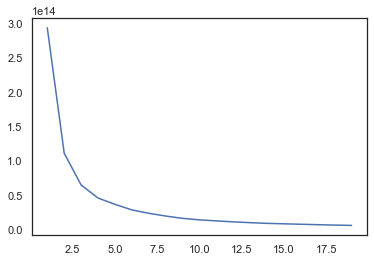

In [98]:
from mpl_toolkits.mplot3d import Axes3D

def elbow_plot(cluster, maxK=71, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(cluster)
            cluster["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(cluster)
            cluster["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(X_c, maxK=20)